In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../Y3 - Sample data/Z2 - datasetprepclean.csv', index_col = 0,
                     )
print('dataset shape:', dataset.shape)
dataset.head()

dataset shape: (5401, 665)


,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,...,bendlength_bend_edge_length_std_04,bendlength_bend_edge_length_min_04,bendlength_bend_edge_length_max_04,VAMAT,VALAJOUT,VALTOT,VOL_COST_CONVHULL,VOL_COST_RECTANGLE,VOL_COST_MPATTERN,bend_group
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,3178.489502,9,0,285678.093750,431798.46875,722.070984,598.000000,320484.593750,286893.718750,4.0,...,163.73709,29.010676,594.972659,12.51,5.15,17.66,0.000010,0.000007,0.000011,3-5
L1600470,317.114502,1,0,3403.138184,3500.00000,140.000000,25.000000,3403.138184,3403.138184,10.0,...,0.00000,0.000000,0.000000,0.25,0.92,1.17,0.000007,0.000007,0.000007,0
L1600600,3710.627930,1,0,522587.812500,522587.81250,1509.000000,346.313995,522587.812500,522587.812500,3.0,...,0.00000,0.000000,0.000000,18.36,7.55,25.91,0.000012,0.000012,0.000012,1-2
L1600610,3232.627930,1,0,439818.781250,439818.78125,1270.000000,346.313995,439818.781250,439818.781250,3.0,...,0.00000,0.000000,0.000000,9.18,4.77,13.95,0.000007,0.000007,0.000007,1-2
L1600620,2972.627930,1,0,394797.968750,394797.96875,1140.000000,346.313995,394797.968750,394797.968750,3.0,...,0.00000,0.000000,0.000000,9.18,4.65,13.83,0.000008,0.000008,0.000008,1-2


# Target definition

In [3]:
target = 'VAMAT'

In [4]:
#possible Outliers
outlierdf = pd.read_csv(f'../Y3 - Sample data/Z3 - {target}-outliers.csv', header=None)
outlierdf.columns = ['thickness', 'COART', 'MSE']
print(outlierdf.shape)
outlierdf.head()

(45, 3)


,thickness,COART,MSE
0,2.0,L5605491,464.201585
1,2.0,L7001102,7.123003
2,2.0,L7067210,6.603070
3,2.0,L6003790,5.757532
4,2.0,L7068980,5.659810


In [5]:
#dataset.columns.values

In [6]:
dataset=dataset.drop(['temp'], axis=1)

In [7]:
for index, nancount in dataset.isnull().sum().iteritems():
    if nancount != 0:
        print(index, '-->', nancount)
else:
    print('Done !')

benddxf_deformation_length_00 --> 262
benddxf_deformation_length_01 --> 123
benddxf_deformation_length_02 --> 19
benddxf_deformation_length_03 --> 6
benddxf_deformation_length_04 --> 1
benddxf_deformation_length_05 --> 1
bendlength_deformation_length_00 --> 296
bendlength_deformation_length_01 --> 112
bendlength_deformation_length_02 --> 3
bendlength_deformation_length_03 --> 1
Done !


In [8]:
#Cleaning of the remaining Nan
#dataset = dataset.fillna(0)
dataset = dataset.dropna()
dataset.shape

(5105, 664)

# Blocs creation

In [9]:
#Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()

In [11]:
#T-sne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

In [12]:
#Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,
                random_state=0
               )

# X definition

In [13]:
#labelling all the outliers
df = dataset.reset_index()['COART'].apply(lambda x: 1 if x in outlierdf.COART.tolist() else 0)
dataset['outlier'] = df.tolist()
dataset.head()

,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,...,bendlength_bend_edge_length_min_04,bendlength_bend_edge_length_max_04,VAMAT,VALAJOUT,VALTOT,VOL_COST_CONVHULL,VOL_COST_RECTANGLE,VOL_COST_MPATTERN,bend_group,outlier
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,3178.489502,9,0,285678.093750,431798.46875,722.070984,598.000000,320484.593750,286893.718750,4.0,...,29.010676,594.972659,12.51,5.15,17.66,0.000010,0.000007,0.000011,3-5,0
L1600470,317.114502,1,0,3403.138184,3500.00000,140.000000,25.000000,3403.138184,3403.138184,10.0,...,0.000000,0.000000,0.25,0.92,1.17,0.000007,0.000007,0.000007,0,0
L1600600,3710.627930,1,0,522587.812500,522587.81250,1509.000000,346.313995,522587.812500,522587.812500,3.0,...,0.000000,0.000000,18.36,7.55,25.91,0.000012,0.000012,0.000012,1-2,0
L1600610,3232.627930,1,0,439818.781250,439818.78125,1270.000000,346.313995,439818.781250,439818.781250,3.0,...,0.000000,0.000000,9.18,4.77,13.95,0.000007,0.000007,0.000007,1-2,0
L1600620,2972.627930,1,0,394797.968750,394797.96875,1140.000000,346.313995,394797.968750,394797.968750,3.0,...,0.000000,0.000000,9.18,4.65,13.83,0.000008,0.000008,0.000008,1-2,0


In [14]:
limitedset = ['cut_length', 'num_closed_patterns', 'num_open_patterns', 'total_area', 'minimum_rectangle_area',
              'minimum_rectangle_dim1', 'minimum_rectangle_dim2', 'convex_hull_area', 'no_hole_area', 'weight']
limitedset.append(target)

# 1 Bend as a float
limitedset.append('thickness')

# 2 Thickness as categories
#limitedset.extend([x for x in dataset.columns.values if x.startswith('thick_')])

# 3 Different counts
limitedset.extend(['radius_count', 'direction_count', 'bend_count'])

# 4 Bends in groups
#limitedset.extend([x for x in dataset.columns.values if x.startswith('bend_gr_')])

# 5 bends according DXF
#limitedset.extend([x for x in dataset.columns.values if x.startswith('benddxf_')])

# 6 according DXF, sorted by length
if target != 'VAMAT':
    limitedset.extend([x for x in dataset.columns.values if x.startswith('bendlength_')])


print(len(limitedset))
limitedset

14


['cut_length',
 'num_closed_patterns',
 'num_open_patterns',
 'total_area',
 'minimum_rectangle_area',
 'minimum_rectangle_dim1',
 'minimum_rectangle_dim2',
 'convex_hull_area',
 'no_hole_area',
 'VAMAT',
 'thickness',
 'radius_count',
 'direction_count',
 'bend_count']

In [15]:
#Dataset definition
dataset[limitedset]
dataset[limitedset].shape

(5105, 14)

# Kmeans - PCA analysis

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
pipe = [('scaler', scaler), ('pca', pca), ('kmeans', kmeans)]
kmeanpip = Pipeline(pipe)

In [18]:
kmeanpip.set_params(kmeans__n_clusters = 4) 
#kmeanpip.set_params(kmeans__random_state = None)
#kmeanpip.set_params(kmeans__algorithm = 'full')

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0))])

In [19]:
kmeanpip.fit(dataset[limitedset])

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0))])

In [20]:
# Graph construction
def plot_clust(pipe_estimator, X):
    pipe_estimator.fit(X)
    Xscaled = pipe_estimator.named_steps['scaler'].transform(X)
    coords = pipe_estimator.named_steps['pca'].transform(Xscaled)[:,:2]
    colors = pipe_estimator.predict(X)
    centers = pipe_estimator.named_steps['kmeans'].cluster_centers_

    fig, ax = plt.subplots(figsize=(15,10))
    plt.scatter(x=coords[:,0], y=coords[:,1], c=colors)
    plt.colorbar()
    for i, center in enumerate(centers):
        plt.scatter(center[0], center[1], marker=f'${i}$', alpha=1, s=50, edgecolor='k')
    
    df = dataset[dataset['outlier'] == 1]
    XSO = pipe_estimator.named_steps['scaler'].transform(df[limitedset])
    coordsO = pipe_estimator.named_steps['pca'].transform(XSO)[:,:2]
    plt.scatter(x=coordsO[:,0], y=coordsO[:,1], c='r')
    
    
    plt.show()

#plot_clust(kmeanpip, X)

/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: 

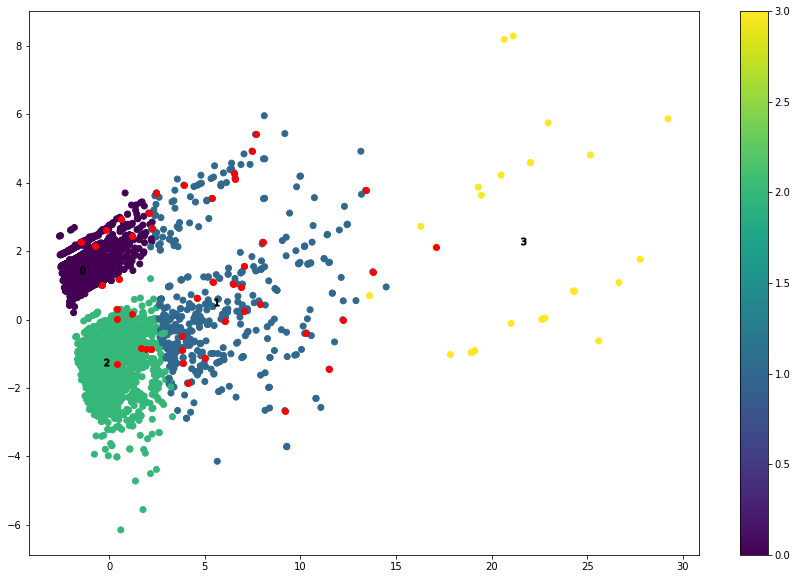

(5105, 665)

In [21]:
df = dataset#[dataset['thickness']==6]
plot_clust(kmeanpip, df[limitedset])
df.shape

In [22]:
df = dataset[dataset['outlier'] == 1]
kmeanpip.predict(df[limitedset])

array([1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 3, 1, 0,
       1, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1,
       1], dtype=int32)

In [23]:
labeltoshow = 1

coltodisplay = limitedset

labels = kmeanpip.predict(dataset[limitedset])
mask = np.where(labels==labeltoshow)
dataset.iloc[mask][coltodisplay].describe()

,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,VAMAT,thickness,radius_count,direction_count,bend_count
count,476.000000,476.000000,476.000000,4.760000e+02,4.760000e+02,476.000000,476.000000,4.760000e+02,4.760000e+02,476.000000,476.000000,476.000000,476.000000,476.000000
mean,5040.953392,13.991597,0.163866,4.520996e+05,6.881398e+05,1442.590018,518.968377,5.567838e+05,4.683633e+05,30.343130,5.144958,0.909664,1.052521,2.768908
std,1520.716775,13.956924,1.077246,2.621189e+05,3.334855e+05,606.223448,226.521856,2.653948e+05,2.607158e+05,21.678274,2.776214,0.517312,0.635257,2.227380
min,2640.497803,1.000000,0.000000,8.447344e+04,1.942722e+05,594.341553,72.005997,1.942722e+05,1.126448e+05,2.420000,1.500000,0.000000,0.000000,0.000000
25%,3947.888550,4.000000,0.000000,2.771636e+05,4.375840e+05,1012.001465,344.576782,3.493990e+05,2.946937e+05,14.690000,3.000000,1.000000,1.000000,1.000000
50%,4758.896973,10.000000,0.000000,3.673701e+05,5.811934e+05,1274.642212,509.813248,4.719880e+05,3.821638e+05,24.480000,4.000000,1.000000,1.000000,2.000000
75%,5679.618896,20.000000,0.000000,5.653666e+05,8.731619e+05,1762.756744,679.263382,7.205056e+05,5.803484e+05,41.780000,6.000000,1.000000,1.000000,4.000000
max,11328.504883,92.000000,13.000000,1.547884e+06,2.037849e+06,3323.000000,1258.381958,1.632198e+06,1.551043e+06,152.500000,15.000000,3.000000,2.000000,15.000000


# Kmeans - T-SNE analysis

In [24]:
dataset[limitedset].shape

(5105, 14)

In [68]:
df = dataset#[dataset['thickness'] == 8]
df = df[limitedset]
X_scaled = scaler.fit_transform(df)
X_scaled.shape

(5105, 14)

In [69]:
X_tsne = tsne.fit_transform(X_scaled)
X_tsne.shape

(5105, 2)

In [70]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X_tsne)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

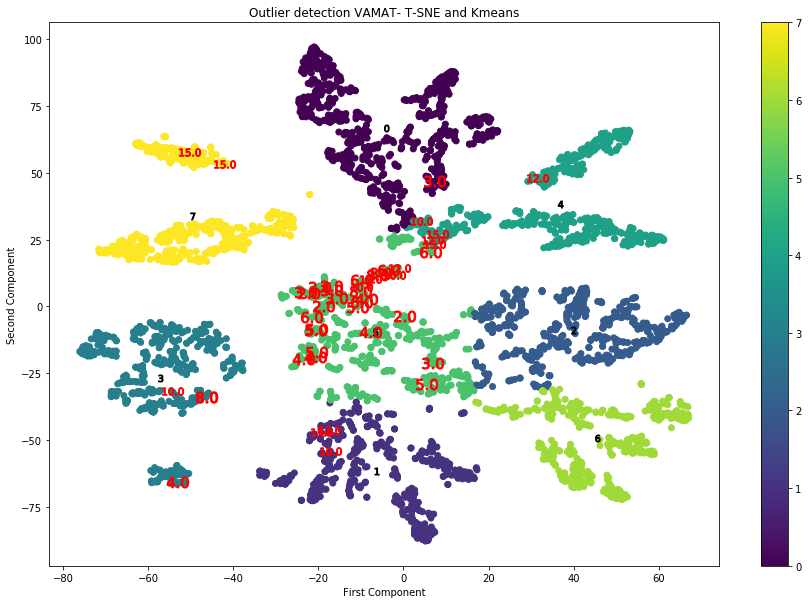

In [94]:
# Graph construction
def plot_clust_tsne(estimator, X_tsne):
    estimator.fit(X_tsne)
    colors = estimator.predict(X_tsne)
    centers = estimator.cluster_centers_
    coords = X_tsne
    fig, ax = plt.subplots(figsize=(15,10))
    plt.scatter(x=coords[:,0], y=coords[:,1], c=colors)
    plt.colorbar()
    for i, center in enumerate(centers):
        plt.scatter(center[0], center[1], marker=f'${i}$', alpha=1, s=50, edgecolor='k')
    
    cleanedset = dataset#[dataset['thickness'] == 8]
    coordsO = X_tsne[cleanedset['outlier'] == 1]#[:,:2]
    for (index, th), center in zip(dataset[dataset['outlier'] == 1].iterrows(), coordsO):
        i=th.thickness
        plt.scatter(center[0], center[1], marker=f'${i}$', alpha=1, s=500, color='r')
    #plt.scatter(x=coordsO[:,0], y=coordsO[:,1], c='r')
    plt.title('Outlier detection VAMAT- T-SNE and Kmeans')
    plt.xlabel('First Component')
    plt.ylabel('Second Component')
    
    
    plt.show()

plot_clust_tsne(kmeans, X_tsne)

In [76]:
for index, x in dataset[dataset['outlier'] == 1].iterrows():
    print(x.thickness)



3.0
6.0
15.0
10.0
10.0
8.0
8.0
12.0
15.0
12.0
12.0
15.0
12.0
10.0
4.0
10.0
6.0
10.0
2.0
3.0
2.0
3.0
4.0
4.0
5.0
5.0
2.0
5.0
8.0
8.0
15.0
8.0
4.0
6.0
4.0
2.0
2.0
3.0
3.0
15.0
6.0
12.0
5.0
6.0
5.0


In [41]:
limitedset

['cut_length',
 'num_closed_patterns',
 'num_open_patterns',
 'total_area',
 'minimum_rectangle_area',
 'minimum_rectangle_dim1',
 'minimum_rectangle_dim2',
 'convex_hull_area',
 'no_hole_area',
 'VAMAT',
 'thickness',
 'radius_count',
 'direction_count',
 'bend_count']

# KMeans - factor analysis

In [42]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=2)

In [43]:
pipe = [('scaler', scaler), ('pca', fa), ('kmeans', kmeans)]
kmeanfapip = Pipeline(pipe)

In [44]:
kmeanfapip.set_params(kmeans__n_clusters = 4) 
#kmeanpip.set_params(kmeans__random_state = None)
#kmeanpip.set_params(kmeans__algorithm = 'full')

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=2,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [45]:
kmeanfapip.fit(dataset[limitedset])

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=2,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

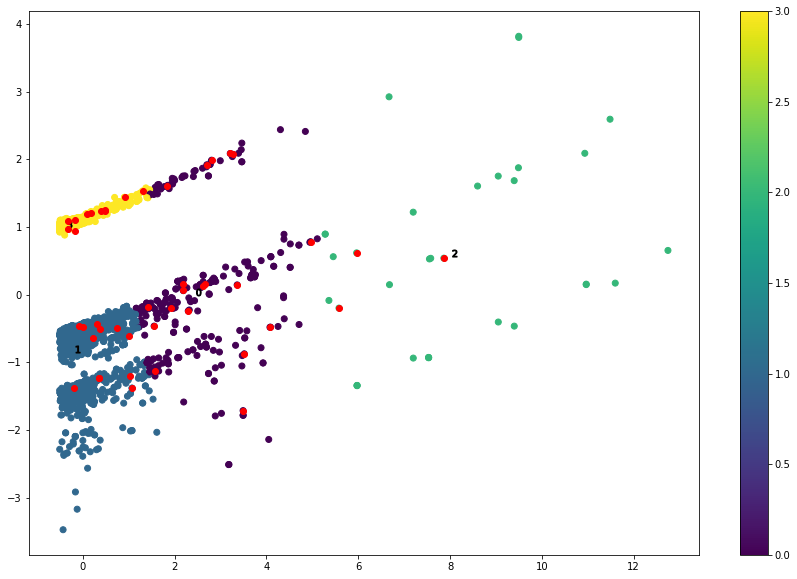

(5105, 665)

In [48]:
df = dataset#[dataset['thickness']==6]
plot_clust(kmeanfapip, df[limitedset])
df.shape